In [15]:
import pandas as pd
import numpy as np
import scipy as cp
import matplotlib.pyplot as plt
import json
from pprint import pprint
import pymongo
from pymongo import MongoClient
import seaborn as sns

In [8]:
## load account events data from json
with open('events_output.json') as f:    
    data = json.load(f)

print(data['Aetna'])

{'eventNum': 2, 'events': {'Reping': 6, 'Maybe Later': 58, 'Emailed Re: Session': 0}}


In [ ]:
## load json into mongoDB
client = MongoClient('localhost', 27017)
db = client.mydb
posts = db.events
for ele in data:
    posts.insert(data[ele])

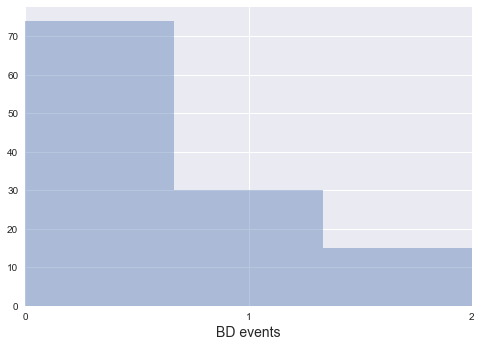

In [36]:
## Plot distribution of events per account
%matplotlib inline
eventNum = [(data[x]['eventNum']) for x in data]
# print(eventNum)

sns.set(color_codes=True)
ax = sns.distplot(eventNum, bins=3, kde=False, rug=False)
ax.set(xlim=(0, 2), xticks=[0,1,2])
ax.set_xlabel('BD events', fontsize=14)

In [58]:
import operator
events=[[x,data[x]['events']] for x in data if data[x]['eventNum']>0]

def orderEvents(eventDict):
    sorted_events = sorted(eventDict.items(), key=operator.itemgetter(1))
    return sorted_events

test = [{x[0]:orderEvents(x[1])} for x in events]
print(len(test))
# test
        
        

45


In [102]:
## load account events data from json
import datetime
with open('status_matrix_output.json') as f:    
    data = json.load(f)
exp = data['Aetna']
# t = datetime.datetime.strptime('2017-02-08', '%Y-%m-%d').date()

collabel = [x[0] for x in exp]
row = list(data.keys())
df = pd.DataFrame(0, index=row, columns=collabel)
df.head(5)

,2017-02-08,2017-02-09,2017-02-10,2017-02-11,2017-02-12,2017-02-13,2017-02-14,2017-02-15,2017-02-16,2017-02-17,...,2017-04-08,2017-04-09,2017-04-10,2017-04-11,2017-04-12,2017-04-13,2017-04-14,2017-04-15,2017-04-16,2017-04-17
City of Boston,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Behavior Health Innovators,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ThriveHive,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The D. E. Shaw Group,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Epidemico Inc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
data

# for key, value in all_accounts.iteritems()
for key, value in data.items():
    if len(value) == len(collabel):
        df.loc[key] = [x[1] for x in value]
#         print(df.loc[key])
    else:
        for ele in value:
            df.loc[key][ele[0]] = ele[1]
df.head(5)


,2017-02-08,2017-02-09,2017-02-10,2017-02-11,2017-02-12,2017-02-13,2017-02-14,2017-02-15,2017-02-16,2017-02-17,...,2017-04-08,2017-04-09,2017-04-10,2017-04-11,2017-04-12,2017-04-13,2017-04-14,2017-04-15,2017-04-16,2017-04-17
City of Boston,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Behavior Health Innovators,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
ThriveHive,1,1,1,1,1,1,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
The D. E. Shaw Group,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,6,6,6,6
Epidemico Inc,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


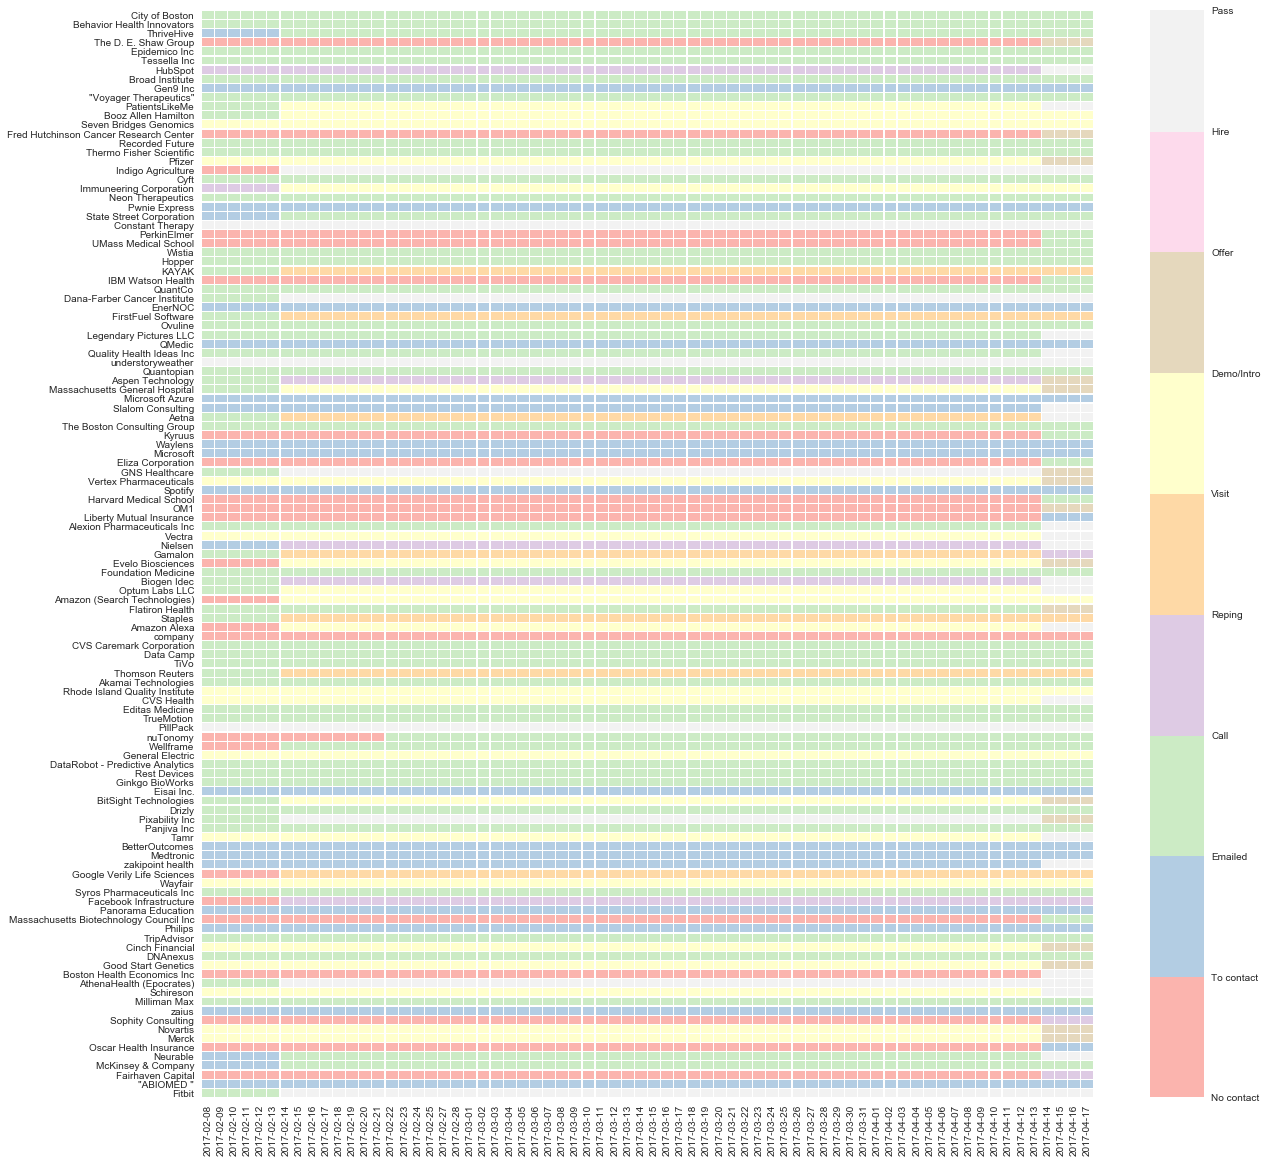

In [135]:
plt.figure(figsize=(20,20))

ax = sns.heatmap(df, linewidths=.2, cmap="Pastel1")  #cmap="YlGnBu", 

cbar = ax.collections[0].colorbar
cbar.set_ticks([0,1,2,3,4,5,6,7,8,9])
cbar.set_ticklabels(['No contact', 'To contact', 'Emailed', 'Call','Reping','Visit','Demo/Intro','Offer','Hire','Pass'])
fig = ax.get_figure()
fig.savefig("output.pdf") 